Sea $X$ una variable aleatoria con distribución normal y $h(t)=I_{[3,\infty)}(t)$ la función característica del intervalo $[3,\infty)$. Entonces, si se considera una secuencia $X_i\sim N(0,1)$ de variables aleatorias independientes, se tiene que $h(X_1), h(X_2), \ldots$ son variables aleatorias independientes e idénticamente distribuidas, con media igual a $E[g(X)]$, por la Ley Fuerte de los Grandes Números, se tiene que:
$$E[h(X)]\simeq \lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=1}^{n}h(X_i)$$

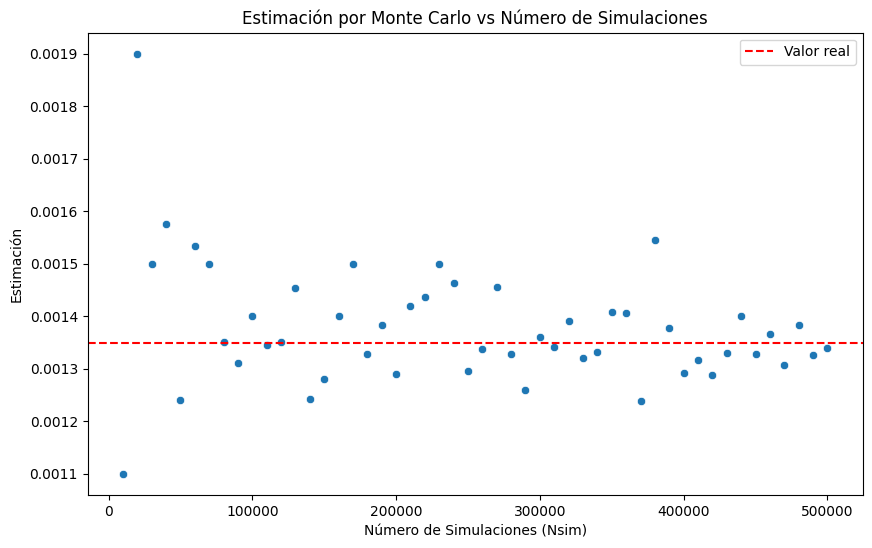

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def monteCarlo(n):
    estimacion = 0
    for _ in range(n):
        X = np.random.normal(0, 1)
        estimacion += 1 if X > 3 else 0
    return round(estimacion/n, 7)

estimacion = []
nsim = []

# Calcula los valores de Nsim
for i in range(50):
    nsim.append((i+1)*10000)

# Calcula la estimación para 50 valores de Nsim
for n in nsim:
    estimacion.append(monteCarlo(n))

# Crea un DataFrame con los valores de Nsim y la estimación
d = {'Nsim': nsim, 'Estimacion': estimacion}
df = pd.DataFrame(data=d)

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nsim', y='Estimacion', data=df)

# Agrega una línea recta horizontal en el valor real (y=0.0013499)
plt.axhline(y=0.0013499, color='r', linestyle='--', label='Valor real')

# Agrega títulos y etiquetas
plt.title('Estimación por Monte Carlo vs Número de Simulaciones')
plt.xlabel('Número de Simulaciones (Nsim)')
plt.ylabel('Estimación')

# Mostra la leyenda
plt.legend()

# Mostra el gráfico
plt.show()

Siguiendo con la idea del ejercicio anterior,

$$E[h(X)]\simeq \lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=1}^{n}
\frac{h(Y_i)f_X(Y_i)}{g_Y(Y_i)}
$$

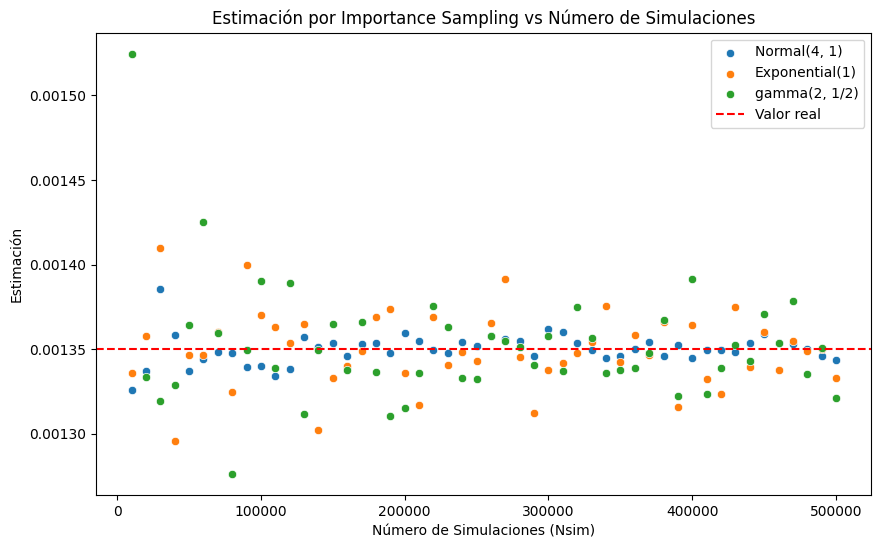

In [69]:
from math import sqrt, pi

def ImportanceSampling(n, generarY, distribucionY):
    estimacion = 0
    const = 1/sqrt(2*pi)
    for _ in range(n):
        Y = generarY()
        h = (Y > 3)
        f = const * np.exp(-Y**2 / 2)
        g = distribucionY(Y)
        estimacion += h * f / g
    return round(estimacion/n, 7)

# Generadores de las 3 funciones
def generarY1():
    return np.random.normal(4, 1)

def generarY2():
    return np.random.exponential(1)

def generarY3():
    return np.random.gamma(2, 1/2)

# Distribuciones de las 3 funciones
def distribucionY1(y): # Normal(4, 1)
    return 1/sqrt(2*pi) * np.exp(-(y-4)**2 / 2)

def distribucionY2(y): # Exponential(1)
    return np.exp(-y) if y > 0 else 0

def distribucionY3(y): # gamma(2, 1/2)
    return 4 * y * np.exp(-2 * y)

generarY = [generarY1, generarY2, generarY3]
distribucionY = [distribucionY1, distribucionY2, distribucionY3]
nsim = [(j+1)*10000 for j in range(50)]
df = []
estimacion = []

for i in range(3):
    estimacion = [ImportanceSampling(n, generarY[i], distribucionY[i]) for n in nsim]

    # Crea un DataFrame con los valores de Nsim y la estimación
    d1 = {'Nsim': nsim, 'Estimacion': estimacion}
    df.append(pd.DataFrame(data=d1))

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Nsim', y='Estimacion', data=df[0], label='Normal(4, 1)')
sns.scatterplot(x='Nsim', y='Estimacion', data=df[1], label='Exponential(1)')
sns.scatterplot(x='Nsim', y='Estimacion', data=df[2], label='gamma(2, 1/2)')

# Agrega una línea recta horizontal en el valor real (y=0.0013499)
plt.axhline(y=0.0013499, color='r', linestyle='--', label='Valor real')

# Agrega títulos y etiquetas
plt.title('Estimación por Importance Sampling vs Número de Simulaciones')
plt.xlabel('Número de Simulaciones (Nsim)')
plt.ylabel('Estimación')

# Mostra la leyenda
plt.legend()

# Mostra el gráfico
plt.show()


Sean
* $N(t)$, con $t\geq 0$, un proceso de Poisson homogéneo con tasa $\lambda=2$, que representa el **número de llamadas recibidas en los primeros $t$ minutos**.
* $X_i$ la variable aleatoria que representa al **tiempo transcurrido entre la llamada $i-1$ y la llamada $i$**, $X_i\sim \mathcal{E}(2)$.
* $S_i$ la variable aleatoria que representa el **tiempo de espera hasta recibir la $i$-ésima llamada**, $S_i=\sum_{j=1}^{i}X_j \sim \text{Gamma}(i,1/2)$.

Así, podemos representar a la probabilidad de que tengan que esperar al menos $10$ minutos para recibir $9$ llamadas como $P(S_9\ge 10)$, con $S_9\sim \text{Gamma}(9,1/2)$. Entonces, la probabilidad de interés es:

$$P(S_9\ge 10)=
\int_{10}^{\infty}\frac{x^8e^{-(x * 2)}}{0.5^9\times\Gamma(9)}dx=\int_{-\infty}^{\infty}I_{[10,\infty)}(x)\frac{x^8e^{-(x * 2)}}{0.5^9\times8!}dx = E[h(X)] = E[I_{[10,\infty)}(X)]$$

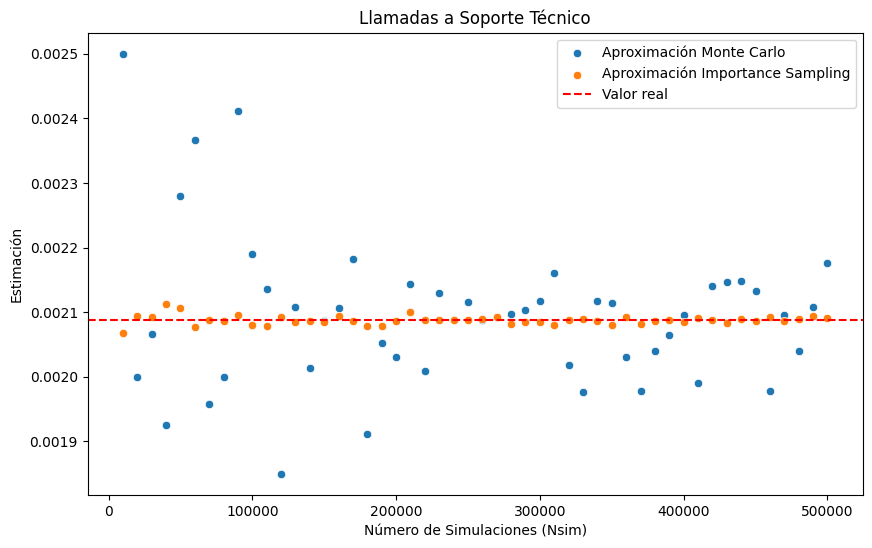

In [70]:
import numpy as np
from math import factorial
from scipy.stats import gamma

def monteCarloS9(n):
    estimacion = 0
    for _ in range(n):
        X = np.random.gamma(9, 1/2)
        estimacion += 1 if X > 10 else 0
    return estimacion/n

def generarY():
    return np.random.normal(11, 1)

def distribucionY(y):
    return 1/sqrt(2*pi) * np.exp(-(y-11)**2 / 2)

def ImportanceSamplingS9(n):
    estimacion = 0
    const = 1/(.5**9 * factorial(8))
    for _ in range(n):
        Y = generarY()
        if Y >= 10:
            f = const * Y**8 * np.exp(-(Y*2))
            g = distribucionY(Y)
            estimacion += f / g
    return estimacion / n

valorReal = 1 - gamma(a=9, scale=0.5).cdf(10)

# Crea un DataFrame para cada método
Nsim = []
estimacion1 = []
estimacion2 = []
for i  in range(50):
    Nsim.append((i+1)*10000)
    estimacion1.append(monteCarloS9(Nsim[i]))
    estimacion2.append(ImportanceSamplingS9(Nsim[i]))

# Crea un DataFrame con los valores de Nsim y la estimación
df[0] = pd.DataFrame(data={'Nsim': Nsim, 'Estimacion': estimacion1})
df[1] = pd.DataFrame(data={'Nsim': Nsim, 'Estimacion': estimacion2})

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Nsim', y='Estimacion', data=df[0], label='Aproximación Monte Carlo')
sns.scatterplot(x='Nsim', y='Estimacion', data=df[1], label='Aproximación Importance Sampling')

# Agrega una línea recta horizontal en el valor real (y=0.0013499)
plt.axhline(y=valorReal, color='r', linestyle='--', label='Valor real')

# Agrega títulos y etiquetas
plt.title('Llamadas a Soporte Técnico')
plt.xlabel('Número de Simulaciones (Nsim)')
plt.ylabel('Estimación')

# Mostra la leyenda
plt.legend()

# Mostra el gráfico
plt.show()